# Problem Statement:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
- President Franklin D. Roosevelt in 1941
- President John F. Kennedy in 1961
- President Richard Nixon in 1973

## Importing the required packages


In [1]:
# Importing numpy for list and series operations
import numpy as np

# To handle data in form of rows and columns 
import pandas as pd 

# This is the regular expression library which helps us manipulate text
import re 

# This is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import nltk 

# To plot the wordcloud
from wordcloud import WordCloud,STOPWORDS

# To import the stop words package
from nltk.corpus import stopwords

# To perform stemming
from nltk.stem import PorterStemmer

# Importing ploting libraries
import matplotlib.pyplot as plt 

# To perform string manipulations
import string

## Importing the data

In [2]:
# Downloading the inaugral corpus to the system
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/nihalt/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [3]:
# Importing the inaugral corpus into the workbook
from nltk.corpus import inaugural

In [4]:
# Gets all the file names in the corpus
print('There are {} speeches in this corpus and are listed as folows:'.format(len(inaugural.fileids())))
inaugural.fileids()

There are 58 speeches in this corpus and are listed as folows:


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [5]:
# Accessing individual speaches - 1941-Roosevelt.txt
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [6]:
# Accessing individual speaches - 11961-Kennedy.txt
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [7]:
# Accessing individual speaches - 1973-Nixon.txt
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [8]:
# Creating a list for all the president names
presidents = ['Franklin D. Roosevelt', 'John F. Kennedy',  'Richard Nixon']

# Creating a list of all the documents
documents = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

In [9]:
# Putting these speaches in a dataframe so that we can easily process the data
col = ['speeches']
# ind = ['Roosevelt', 'Kennedy', 'Nixon']
speech = pd.DataFrame(data=[inaugural.raw('1941-Roosevelt.txt'), inaugural.raw('1961-Kennedy.txt'), inaugural.raw('1973-Nixon.txt')], columns=col, index=presidents)

In [10]:
# Checking if the data frame is created
speech

,speeches
Franklin D. Roosevelt,On each national day of inauguration since 178...
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


-----

## Exploratory Analysis in Text Mining

Getting the word count for each speech

In [11]:
# Computes the number of words in each speech
speech['word_count'] = speech['speeches'].apply(lambda x: len(str(x).split(" ")))
speech[['speeches','word_count']].head()

# # Alternatively
# for i in range(0,speech.shape[0]):
#     print("Word count in President {}'s speech is : {}".format(presidents[i],len(inaugural.words(documents[i]))))

,speeches,word_count
Franklin D. Roosevelt,On each national day of inauguration since 178...,1323
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


Getting the total number of characters in each speech (including spaces)

In [12]:
# Computes the number of characters in each speech
speech['char_count'] = speech['speeches'].apply(lambda x: len(x))
speech[['speeches','char_count']].head()

# # Alternatively
# for i in range(0,speech.shape[0]):
#     print("Word count in President {}'s speech is : {}".format(presidents[i],len(inaugural.raw(documents[i]))))

,speeches,char_count
Franklin D. Roosevelt,On each national day of inauguration since 178...,7571
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


Getting the avereage word length for each speech

In [13]:
# User defined function to get the average word length of any text that is passed
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

# Obtaining the average words length in each speech
speech['avg_word'] = speech['speeches'].apply(lambda x: avg_word(x))
speech[['speeches','avg_word']].head()

,speeches,avg_word
Franklin D. Roosevelt,On each national day of inauguration since 178...,4.539706
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",4.461871
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",4.465091


Number of stopwords in each speech

In [14]:
# Creating a list of stop words in english
stop = stopwords.words('english')

# Obtaining the number of stop words in each speech
speech['stopwords'] = speech['speeches'].apply(lambda x: len([x for x in x.split() if x in stop]))
speech[['speeches','stopwords']].head()

,speeches,stopwords
Franklin D. Roosevelt,On each national day of inauguration since 178...,632
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


The number of sentences in each speech

In [15]:
# Computes the number of sentences in each speech
speech['sent_count'] = speech['speeches'].apply(lambda x: len(str(x).split("\n\n")))
speech[['speeches','sent_count']].head()

# # Alternatively
# for i in range(0,speech.shape[0]):
#     print("Word count in President {}'s speech is : {}".format(presidents[i],len(inaugural.sents(documents[i]))))

,speeches,sent_count
Franklin D. Roosevelt,On each national day of inauguration since 178...,38
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",27
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",51


Number of numerics

In [16]:
# Obtains the number of numerical data in each speech
speech['numerics'] = speech['speeches'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
speech[['speeches','numerics']].head()

,speeches,numerics
Franklin D. Roosevelt,On each national day of inauguration since 178...,2
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1


To get an idea of the most commonly used words before cleaning we will plot a word cloud


Wordcloud for President Franklin D. Roosevelt


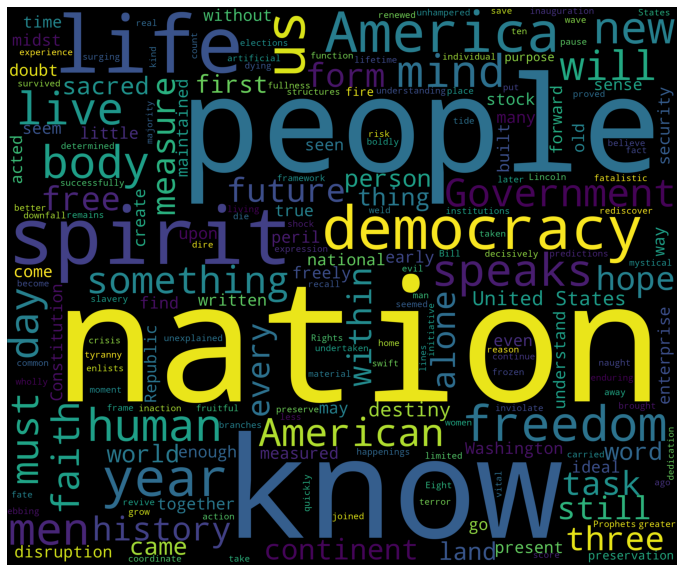


Wordcloud for President John F. Kennedy


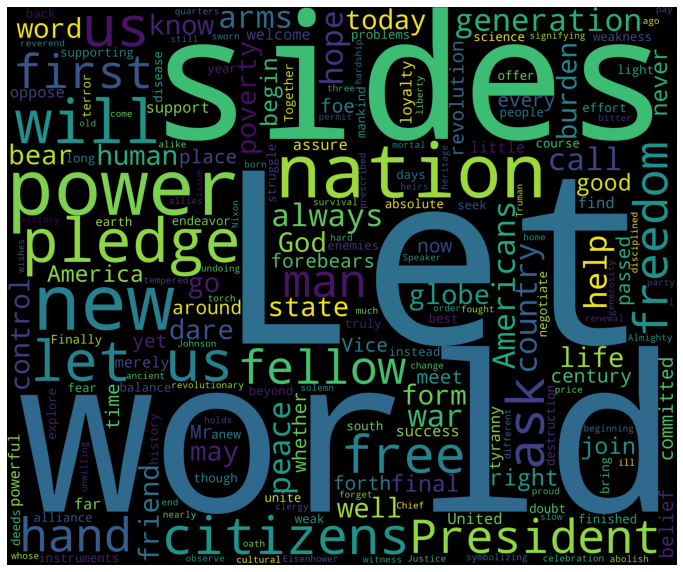


Wordcloud for President Richard Nixon


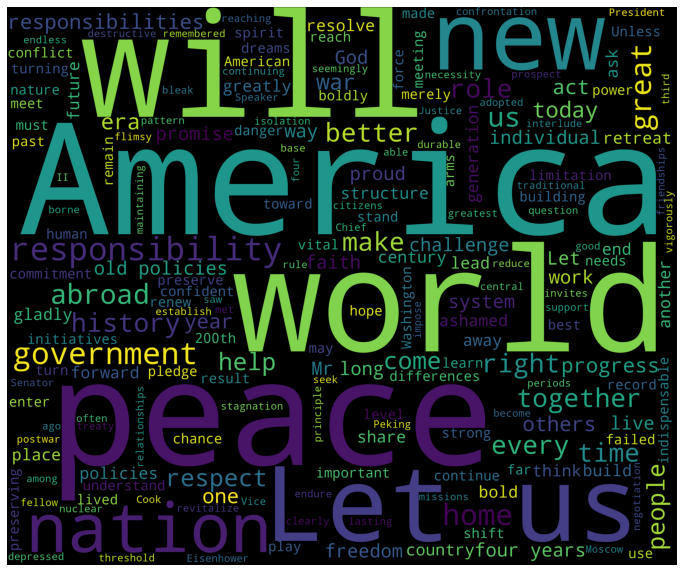

In [17]:
# Plotting a wordcloud for each president individually
for pres in range(0,speech.shape[0]):
    print('\nWordcloud for President {}'.format(presidents[pres]))
    word = " ".join([word for word in speech['speeches'][pres].split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Words like America, let, know etc will prove to be uselss and hence can be removed.

-----
## Pre-Processing

Removal of special characters

In [18]:
speech['speeches'] = speech['speeches'].str.replace('[^\w\s]','')
speech['speeches'].head()

Franklin D. Roosevelt    On each national day of inauguration since 178...
John F. Kennedy          Vice President Johnson Mr Speaker Mr Chief Jus...
Richard Nixon            Mr Vice President Mr Speaker Mr Chief Justice ...
Name: speeches, dtype: object

Converting to lowercase

In [19]:
speech['speeches'] = speech['speeches'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speech['speeches'].head()

Franklin D. Roosevelt    on each national day of inauguration since 178...
John F. Kennedy          vice president johnson mr speaker mr chief jus...
Richard Nixon            mr vice president mr speaker mr chief justice ...
Name: speeches, dtype: object

Removal of stop words

In [20]:
stop = stopwords.words('english')
speech['speeches'] = speech['speeches'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speech['speeches'].head()

Franklin D. Roosevelt    national day inauguration since 1789 people re...
John F. Kennedy          vice president johnson mr speaker mr chief jus...
Richard Nixon            mr vice president mr speaker mr chief justice ...
Name: speeches, dtype: object

Stemming of words

In [21]:
st = PorterStemmer()
speech['speeches'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

Franklin D. Roosevelt    nation day inaugur sinc 1789 peopl renew sens ...
John F. Kennedy          vice presid johnson mr speaker mr chief justic...
Richard Nixon            mr vice presid mr speaker mr chief justic sena...
Name: speeches, dtype: object

Finding the most frequently used words so that we can use it to create a custom list of useless words and remove it

In [22]:
# Most frequent words used in the speeches
freq = pd.Series(' '.join(speech['speeches']).split()).value_counts()[:50]
freq

us                46
let               39
world             27
new               26
peace             23
america           22
nation            21
nations           15
people            14
government        14
freedom           14
shall             13
know              13
years             13
responsibility    12
every             12
history           12
life              12
home              11
spirit            11
together          11
great             11
americas          10
human             10
help              10
time              10
faith              9
pledge             9
make               9
democracy          9
role               8
sides              8
ask                8
come               8
abroad             8
free               8
country            8
today              8
better             8
must               7
progress           7
may                7
war                7
policies           7
old                7
first              7
right              7
hope         

Words like us, let, nation, nations, america, americas, know, shall, every prove to be having no meaning and so can be removed fromt the documents.

In [23]:
# Creating a custom list with the words that the business feels not very usefull
custom_stop = ['us', 'let', 'nation', 'nations', 'america', 'americas', 'know', 'shall', 'every', 'make', 'ask', 'come', 'must', 'sides', 'american', 'united states']

# Remoing the custom stop words from the speeaches
speech['speeches'] = speech['speeches'].apply(lambda x: " ".join(x for x in x.split() if x not in custom_stop))
speech['speeches'].head()

Franklin D. Roosevelt    national day inauguration since 1789 people re...
John F. Kennedy          vice president johnson mr speaker mr chief jus...
Richard Nixon            mr vice president mr speaker mr chief justice ...
Name: speeches, dtype: object

-----
## Top 10 words used by each president

In [24]:
# Obtaining the top words used by each president in the speeches
for pres in range(0,speech.shape[0]):
    print('\nTop 10 words used by President {} in his speech are:'.format(presidents[pres]))
    print(pd.Series(speech['speeches'][pres].split()).value_counts()[:10])


Top 10 words used by President Franklin D. Roosevelt in his speech are:
spirit       9
democracy    9
life         8
people       7
freedom      6
years        6
mind         5
human        5
speaks       5
new          4
dtype: int64

Top 10 words used by President John F. Kennedy in his speech are:
world       8
pledge      7
new         7
citizens    5
free        5
power       5
arms        4
peace       4
call        4
man         4
dtype: int64

Top 10 words used by President Richard Nixon in his speech are:
peace             19
world             16
new               15
responsibility    11
government        10
great              9
home               9
abroad             8
better             7
policies           7
dtype: int64


-----
## Word Cloud for each president


Wordcloud for President Franklin D. Roosevelt


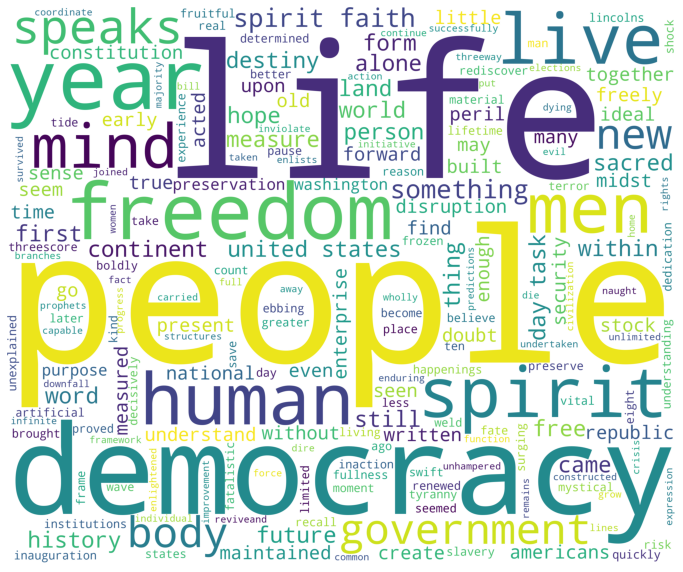


Wordcloud for President John F. Kennedy


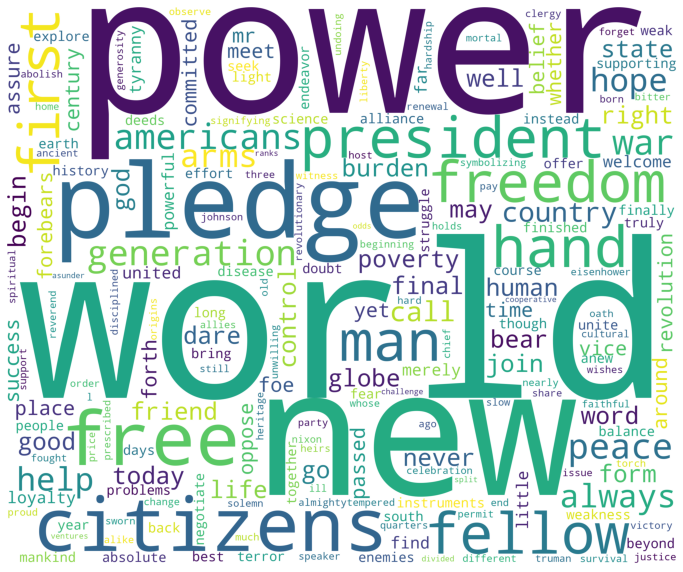


Wordcloud for President Richard Nixon


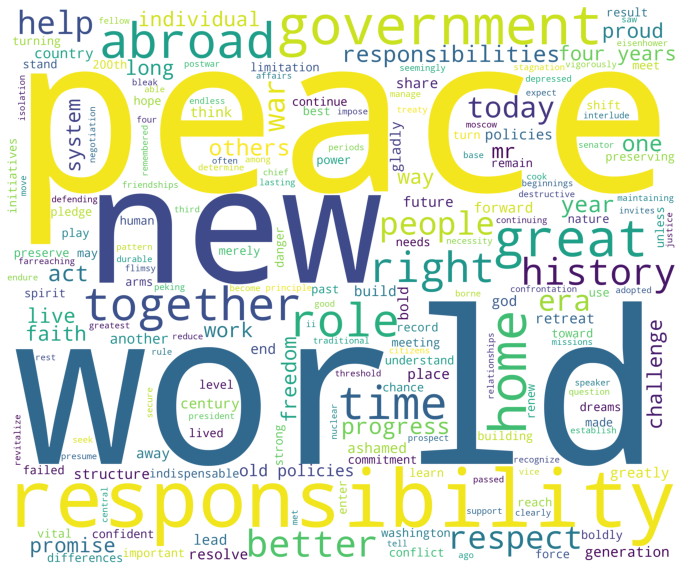

In [26]:
# Plotting a wordcloud for each president individually
for pres in range(0,speech.shape[0]):
    print('\nWordcloud for President {}'.format(presidents[pres]))
    word = " ".join([word for word in speech['speeches'][pres].split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

- Close to half of the words used in each speech are stop words
-	More than 50% of the words used in each speech is made up of stop words
-	President Franklin D. Roosevelt
    - The top 3 words used were: democracy, spirit and life
    - From the word cloud we can observe that he emphasized on people, democracy, life, freedom, spirit, mind, faith.
    - His speech is mainly focused on the spiritual development and liberation of people.
-	President John F. Kennedy
    - The top 3 words used were: world, sides and new
    - From the word cloud we can observe that he emphasized on sides of political parties, world, power, new, free, citizens, poverty, god, war, peace. There are a verity of words all having the same weightage.
    - His speech is focused on the variety of topics ranging from peace, internal policies, worldly affairs, god, war, power, science, arms.
    - He probably has new and holistic idea for the future of America.
-	President Richard Nixon
    - The top three words used were: peace, world, new
    - From the world cloud we can observe that he emphasized on world, peace, new, responsibility, home, together, abroad, respect, rights, history.
    - His speech is focused mainly on the increasing international relations, unity amongst people, focusing on home as a simple unit of the country, government and new policies/ideas. It also looks like he has a lot to learn from the past mistakes as he refers to history many times.

## --------------------------------------------------------------------------------------------------------------